## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [19]:
#Name: Kezia Setokusumo
#Pace: Flex, Oct 10 start
#Scheduled review: Early Dec
#Instructor: Mark Barbour
#Blog URL:

'\nName: Kezia Setokusumo \n\nPace: Flex, Oct 10 start\nScheduled review: Early Dec\nInstructor: Mark Barbour\nBlog URL:\n'

In [ ]:
# Import libraries and connect to SQLite database
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
fin_data=pd.read_csv('bom.movie_gross.csv')
con=sqlite3.connect('im.db')

In [2]:
# Preview gross proceeds financial data
df1=pd.DataFrame(fin_data)
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# List tables in IMDB database
cur=con.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type='table'""")
cur.fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [4]:
# Remove rows with null values
df1=df1.dropna()
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [16]:
# Remove 'year' column
df1_studiogroup = df1.groupby('studio').sum('domestic_gross')
df1_studiogroup = df1_studiogroup.drop(['year'], axis=1)

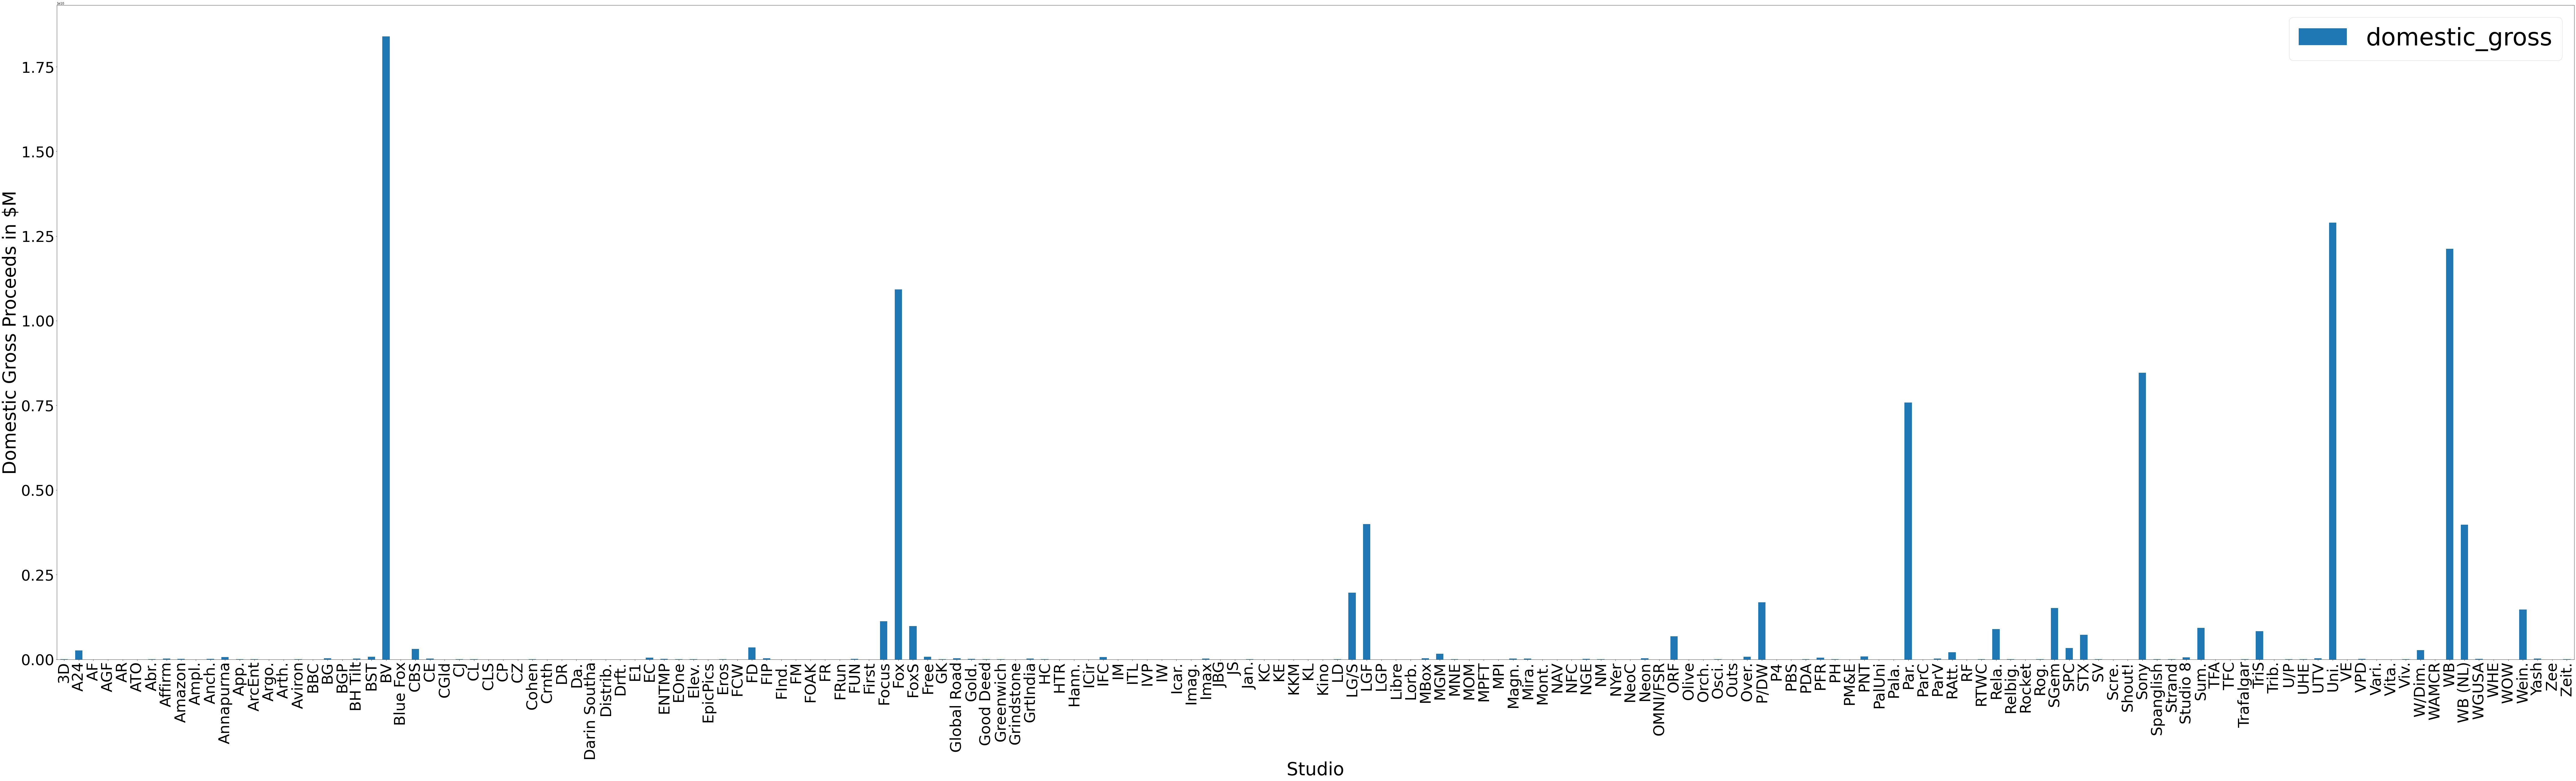

In [17]:
# Bar chart of which studio yields the most domestic gross proceeds
ax1=df1_studiogroup.plot(kind='bar', figsize=(150,40), fontsize=50)
ax1.set_xlabel('Studio', fontsize=60)
ax1.set_ylabel('Domestic Gross Proceeds in $M', fontsize=60)
ax1.legend(fontsize=80)

In [6]:
# Create dataframe of popular genres based on average rating and total votes from the SQLite database 
query1=pd.read_sql("""SELECT mb.genres, mr.averagerating, mr.numvotes FROM movie_basics mb 
            JOIN movie_ratings mr ON mr.movie_id=mb.movie_id
            GROUP BY genres
            ORDER BY averagerating DESC, numvotes DESC""", con)
df_genres=pd.DataFrame(query1)
df_genres

,genres,averagerating,numvotes
0,"Documentary,Family,Romance",9.7,25
1,"Comedy,Documentary,Sport",9.7,22
2,"Comedy,Documentary,Fantasy",9.4,5
3,"Documentary,Family,Musical",9.3,19
4,"Documentary,History,War",9.2,29
...,...,...,...
919,"Action,Animation,Comedy",1.9,8248
920,"Mystery,Romance",1.7,201
921,"Comedy,Musical,Sport",1.4,28
922,"Action,Biography,History",1.3,33


Text(0, 0.5, 'Rating / Number of Votes')

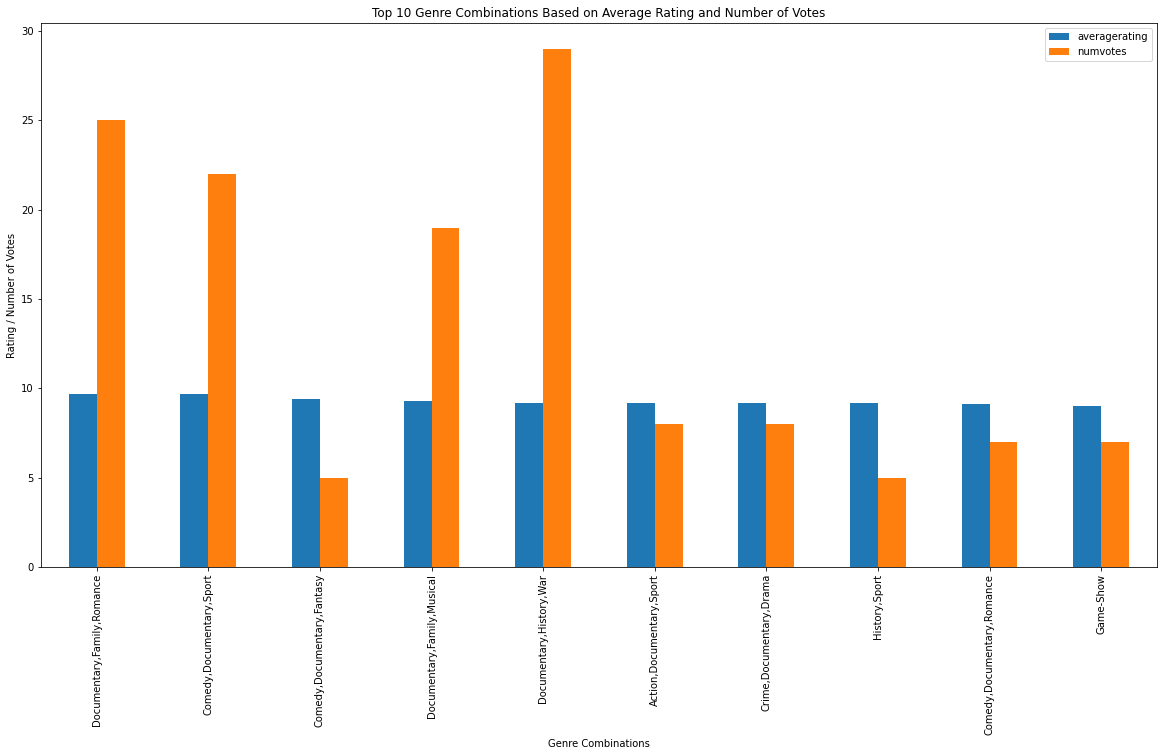

In [7]:
# Visualize the dataframe of popular genres
ax1=df_genres.head(10).plot('genres', kind='bar', figsize=(20,10), title='Top 10 Genre Combinations Based on Average Rating and Number of Votes')
ax1.set_xlabel('Genre Combinations')
ax1.set_ylabel('Rating / Number of Votes')

In [8]:
# Create another dataframe of popular persons based on average rating and total votes from the SQLite database
query2=pd.read_sql("""SELECT p.primary_name, mr.averagerating, mr.numvotes FROM persons p
                    JOIN known_for k
                    ON k.person_id=p.person_id
                    JOIN movie_basics mb 
                    ON mb.movie_id=k.movie_id
                    JOIN movie_ratings mr
                    ON mr.movie_id=mb.movie_id
                    GROUP BY primary_name
                    ORDER BY averagerating DESC, numvotes DESC""", con)
df_people=pd.DataFrame(query2)
df_people

,primary_name,averagerating,numvotes
0,Brian Baucum,10.0,8
1,Loreto Di Cesare,10.0,8
2,Paul Greive,10.0,8
3,Lindsay Thompson,10.0,7
4,Ahad Fattahi,10.0,6
...,...,...,...
333889,P. Prem Anand Pillai,1.0,5
333890,Paula Stein,1.0,5
333891,Roberto Attolini,1.0,5
333892,Sheril Aida,1.0,5


Text(0, 0.5, 'Rating / Number of Votes')

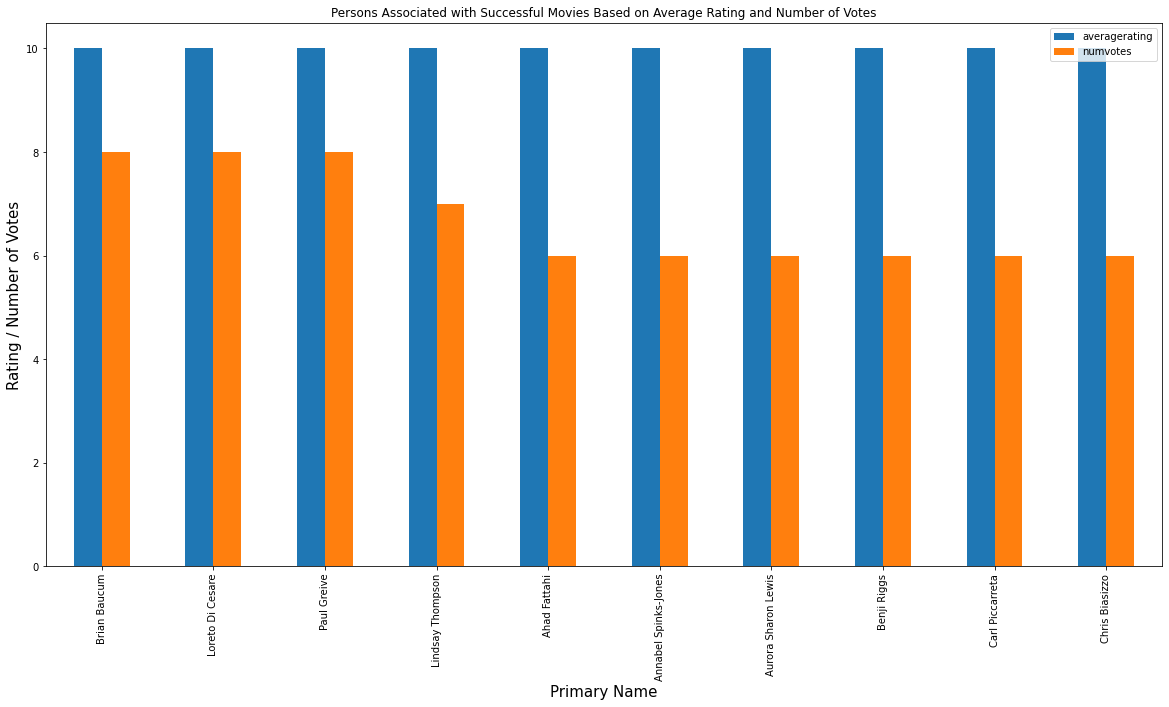

In [9]:
# Visualize the dataframe of popular persons
ax2=df_people.head(10).plot('primary_name', kind='bar', figsize=(20,10), title='Persons Associated with Successful Movies Based on Average Rating and Number of Votes')
ax2.set_xlabel('Primary Name', fontsize=15)
ax2.set_ylabel('Rating / Number of Votes', fontsize=15)